In [6]:
# Import necessary libraries
from IPython import get_ipython
from IPython.display import display
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.metrics import accuracy_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2, 3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

# Data exploration and preprocessing
df.info()
df.isnull().sum()
df.dropna(inplace=True)
df = df[df['text'].apply(len) > 1]
df['sentiment'].value_counts()

# Install necessary packages
!pip install git+https://github.com/kgptalkie/preprocess_kgptalkie.git # Install preprocess_kgptalkie from GitHub
!pip install googletrans==3.1.0a0

# Import preprocess_kgptalkie and extract basic features
import preprocess_kgptalkie as ps  # Import from the specific module
df = ps.get_basic_features(df)

# Data visualization
# ... (Existing code for data visualization remains unchanged)

# Data cleaning
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Model training and evaluation
stopwords_list = list(stopwords)
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
  Cloning https://github.com/kgptalkie/preprocess_kgptalkie.git to /tmp/pip-req-build-bets7ksr
  Running command git clone --filter=blob:none --quiet https://github.com/kgptalkie/preprocess_kgptalkie.git /tmp/pip-req-build-bets7ksr
  Resolved https://github.com/kgptalkie/preprocess_kgptalkie.git to commit 9884ba65fc3068d5ca4d67c15a84c432a41f03cb
  Preparing metadata (setup.py) ... done


AttributeError: module 'preprocess_kgptalkie' has no attribute 'get_basic_features'

In [7]:
!pip install git+https://github.com/kgptalkie/preprocess_kgptalkie.git
import preprocess_kgptalkie as ps

def get_basic_features(df):
    """
    This function takes a pandas DataFrame containing text data and
    calculates basic features like word count, character count,
    average word length, and more.

    Args:
        df (pd.DataFrame): Input DataFrame with a 'text' column.

    Returns:
        pd.DataFrame: DataFrame with added features.
    """
    df['char_count'] = df['text'].apply(len)
    df['word_count'] = df['text'].apply(lambda x: len(x.split()))
    df['word_density'] = df['char_count'] / (df['word_count']+1)
    df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
    df['title_word_count'] = df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
    df['upper_case_word_count'] = df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
    return df

import string
df = get_basic_features(df)  # Call our custom function



  Cloning https://github.com/kgptalkie/preprocess_kgptalkie.git to /tmp/pip-req-build-movl87nm
  Running command git clone --filter=blob:none --quiet https://github.com/kgptalkie/preprocess_kgptalkie.git /tmp/pip-req-build-movl87nm
  Resolved https://github.com/kgptalkie/preprocess_kgptalkie.git to commit 9884ba65fc3068d5ca4d67c15a84c432a41f03cb
  Preparing metadata (setup.py) ... done


In [8]:
df.columns


Index(['sentiment', 'text', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'upper_case_word_count'],
      dtype='object')

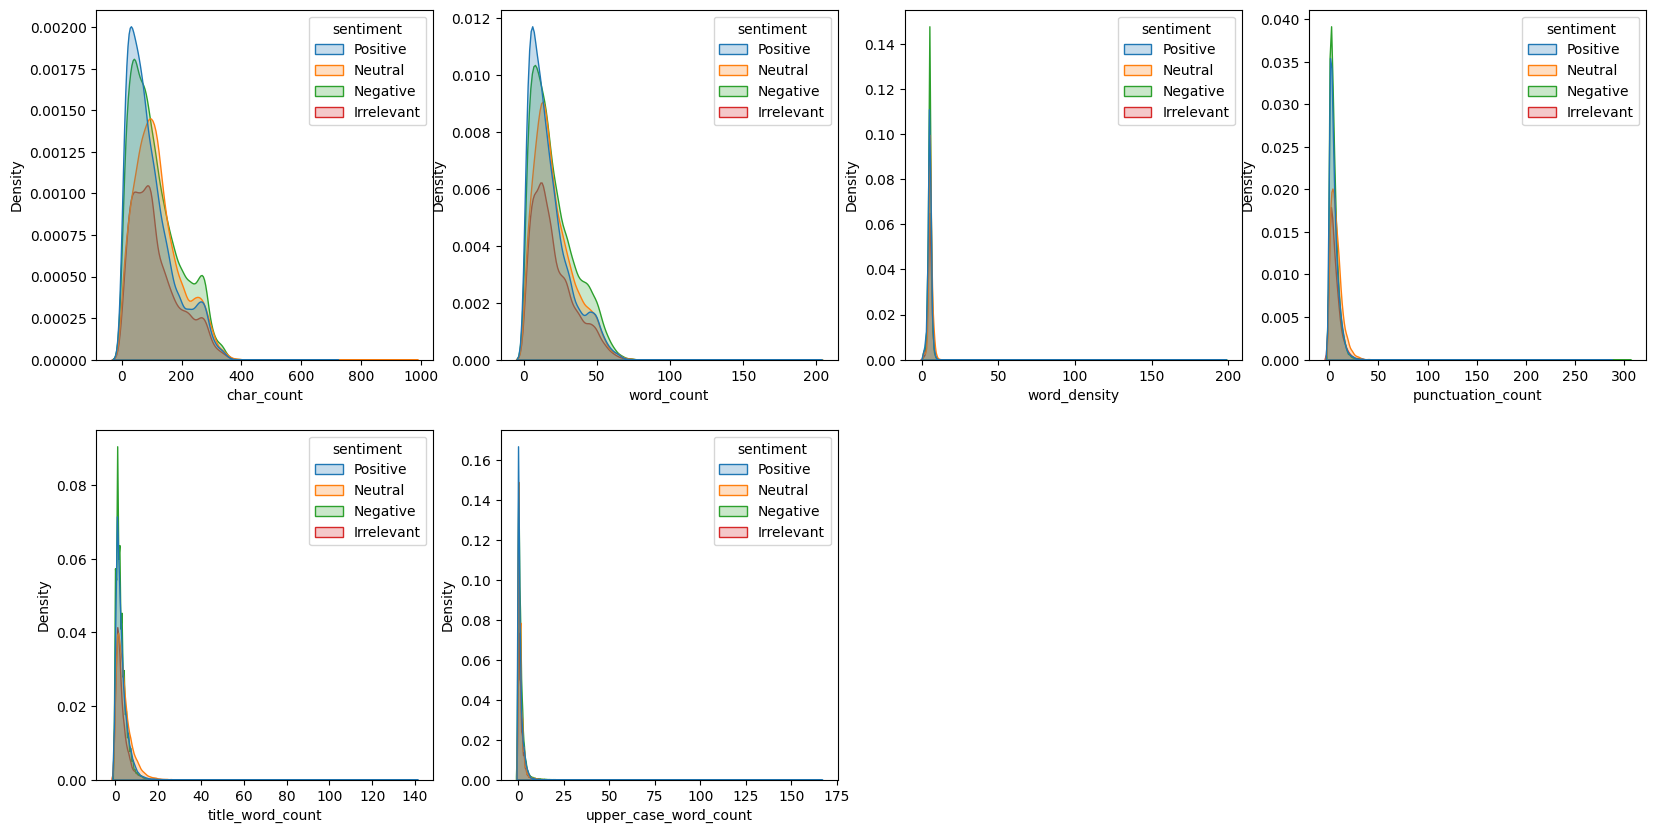

In [9]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

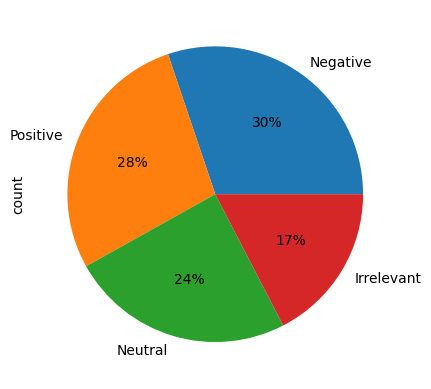

In [10]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

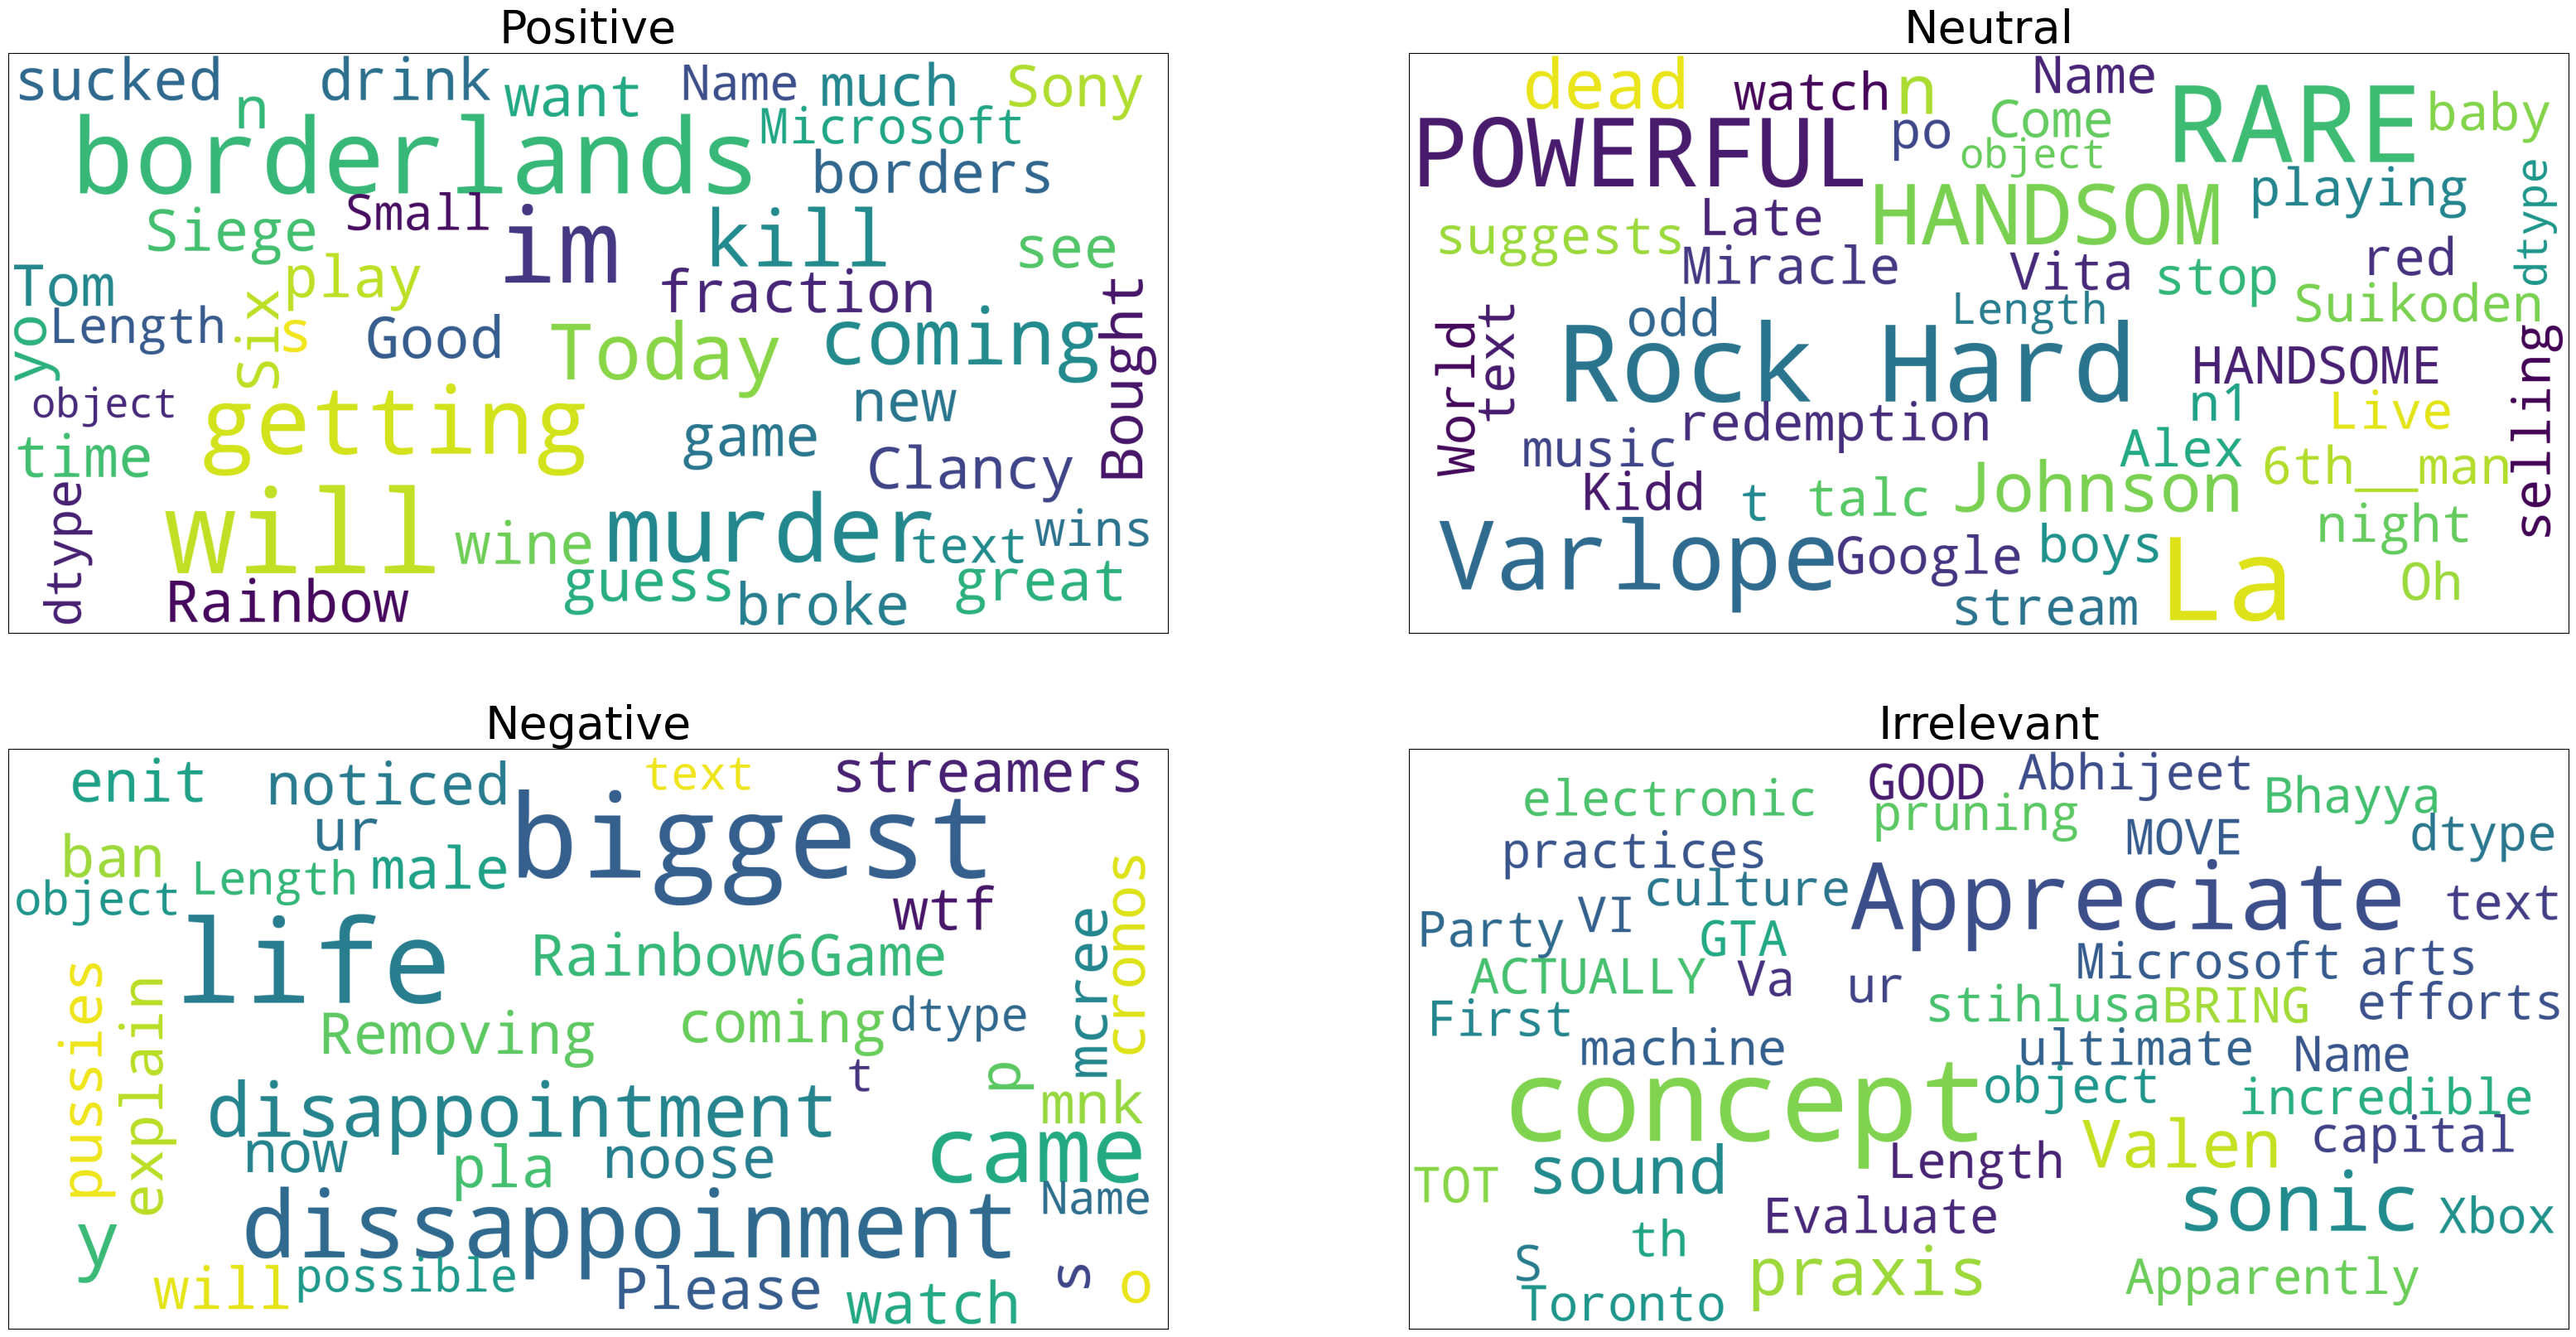

<Figure size 640x480 with 0 Axes>

In [11]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [12]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.model_selection import train_test_split

stopwords_list = list(stopwords)

0.9073677160080376


In [16]:
stopwords_list

['off',
 'although',
 'three',
 'whenever',
 'mostly',
 'other',
 'namely',
 'whereas',
 "'d",
 'move',
 'becomes',
 'wherein',
 'myself',
 'side',
 'moreover',
 'towards',
 'sometimes',
 'thereby',
 '‘re',
 'your',
 'then',
 'out',
 'well',
 'various',
 'on',
 'behind',
 'since',
 'five',
 'throughout',
 'whom',
 'over',
 'now',
 'sixty',
 'anyway',
 '‘ve',
 'used',
 'enough',
 'besides',
 'its',
 'somehow',
 'afterwards',
 'ourselves',
 'former',
 're',
 'himself',
 'until',
 'at',
 'beforehand',
 'nobody',
 'indeed',
 'if',
 '’d',
 'whence',
 'along',
 'anything',
 'made',
 'therefore',
 'could',
 'for',
 'most',
 'not',
 'did',
 'noone',
 'latter',
 'get',
 'via',
 'anywhere',
 'once',
 'am',
 'twenty',
 'were',
 'who',
 'amount',
 'somewhere',
 'might',
 'ten',
 'using',
 'anyhow',
 'becoming',
 'whether',
 'only',
 'too',
 'from',
 'due',
 'these',
 'nevertheless',
 'us',
 'please',
 'even',
 'toward',
 'before',
 'after',
 'own',
 '‘m',
 'each',
 'nine',
 'two',
 '‘s',
 'nor',
 

In [17]:
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords_list)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])


In [18]:
clf.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['off', 'although', 'three',
                                             'whenever', 'mostly', 'other',
                                             'namely', 'whereas', "'d", 'move',
                                             'becomes', 'wherein', 'myself',
                                             'side', 'moreover', 'towards',
                                             'sometimes', 'thereby', '‘re',
                                             'your', 'then', 'out', 'well',
                                             'various', 'on', 'behind', 'since',
                                             'five', 'throughout', 'whom', ...])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [19]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9060951105157401
